In [198]:
import matplotlib.pyplot as plt
import numpy as np

NUMBA

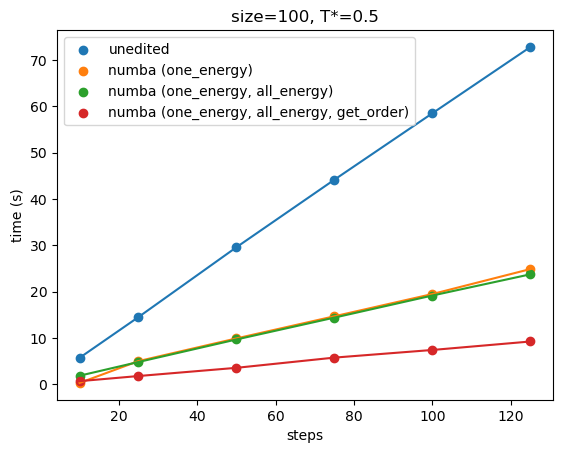

In [15]:
#const size = 100
steps = [10,25,50,75,100,125]

unedited = [5.7,14.49, 29.58, 44.179338,58.53,72.85]
numba_oe = [0.277,4.987, 9.8899, 14.676,19.479851, 24.8729]
numba_oe_ae = [1.835, 4.794458, 9.6634, 14.386, 19.158, 23.74]
numba_oe_ae_go = [0.659,1.7644,3.538,5.746, 7.395595, 9.225558]

fig, ax = plt.subplots()

ax.plot(steps, unedited)
ax.scatter(steps, unedited, label='unedited')

ax.scatter(steps, numba_oe, label='numba (one_energy)')
ax.plot(steps, numba_oe)

ax.scatter(steps, numba_oe_ae, label='numba (one_energy, all_energy)')
ax.plot(steps, numba_oe_ae)

ax.scatter(steps, numba_oe_ae_go, label='numba (one_energy, all_energy, get_order)')
ax.plot(steps, numba_oe_ae_go)

ax.set(xlabel = 'steps',
       ylabel = 'time (s)',
       title = 'size=100, T*=0.5');
ax.legend()

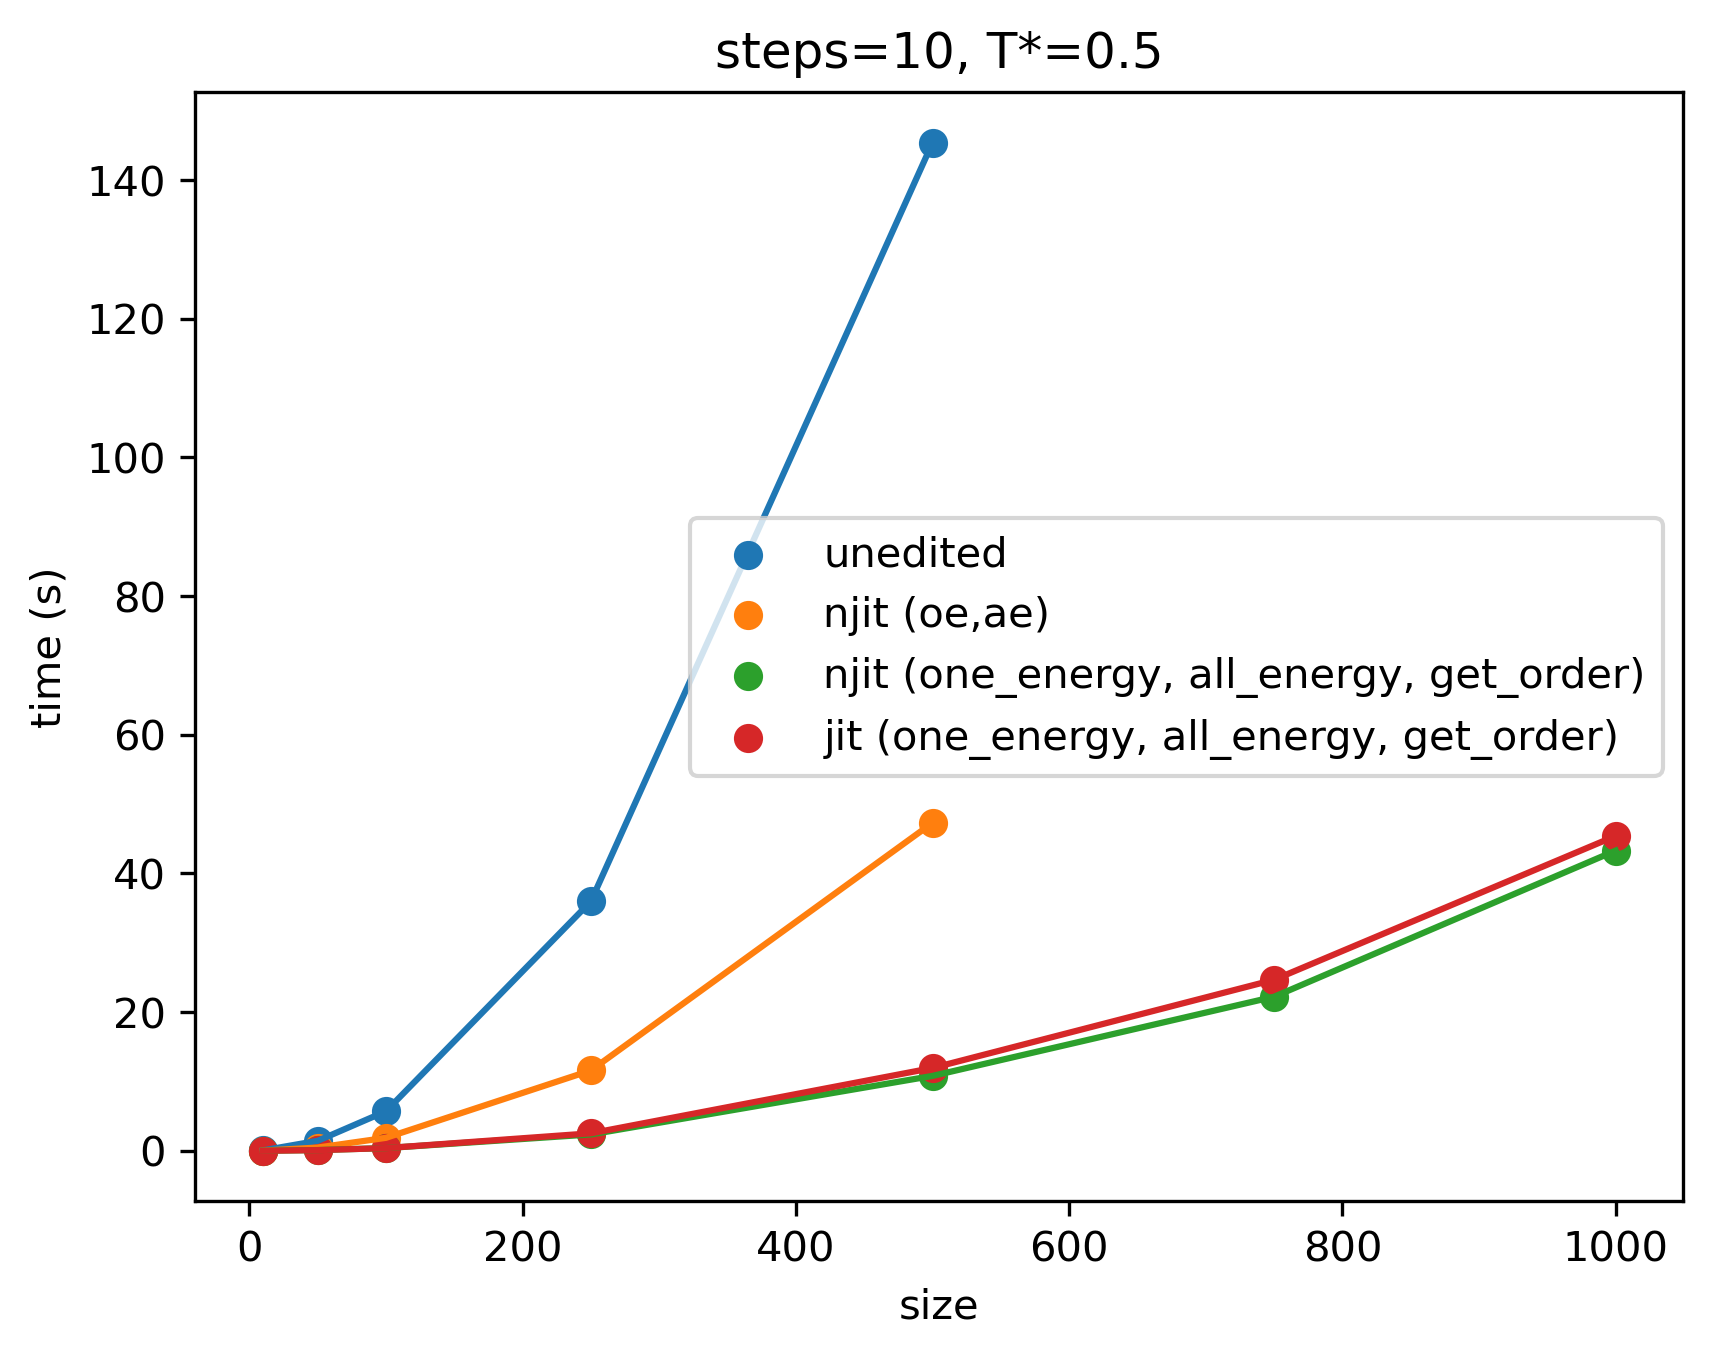

In [118]:
#const steps=10
size = [10,50,100,250,500]
size2 = [10,50,100,250,500,750,1000]
unedited = [0.061093, 1.438, 5.7, 35.982, 145.39]
numba_oe_ae_2 = [0.0208,0.467, 1.872,11.59, 47.3]


numba_allf = [0.0043, 0.106,0.39, 2.36,10.8, 22.22, 43.3]
jit_oe_ae_go = [0.004368,0.096534, 0.388053, 2.523005, 11.940983,24.669371,45.42]

fig, ax = plt.subplots()
ax.plot(size, unedited)
ax.scatter(size, unedited, label='unedited')




ax.scatter(size, numba_oe_ae_2, label='njit (oe,ae)')
ax.plot(size, numba_oe_ae_2)

ax.scatter(size2, numba_allf, label='njit (one_energy, all_energy, get_order)', )
ax.plot(size2, numba_allf)

ax.scatter(size2, jit_oe_ae_go, label='jit (one_energy, all_energy, get_order)', )
ax.plot(size2, jit_oe_ae_go)

ax.set(xlabel = 'size',
       ylabel = 'time (s)',
       title = 'steps=10, T*=0.5');

#ax.set_ylim(0,50)

ax.legend()
#plt.savefig('numba.png')

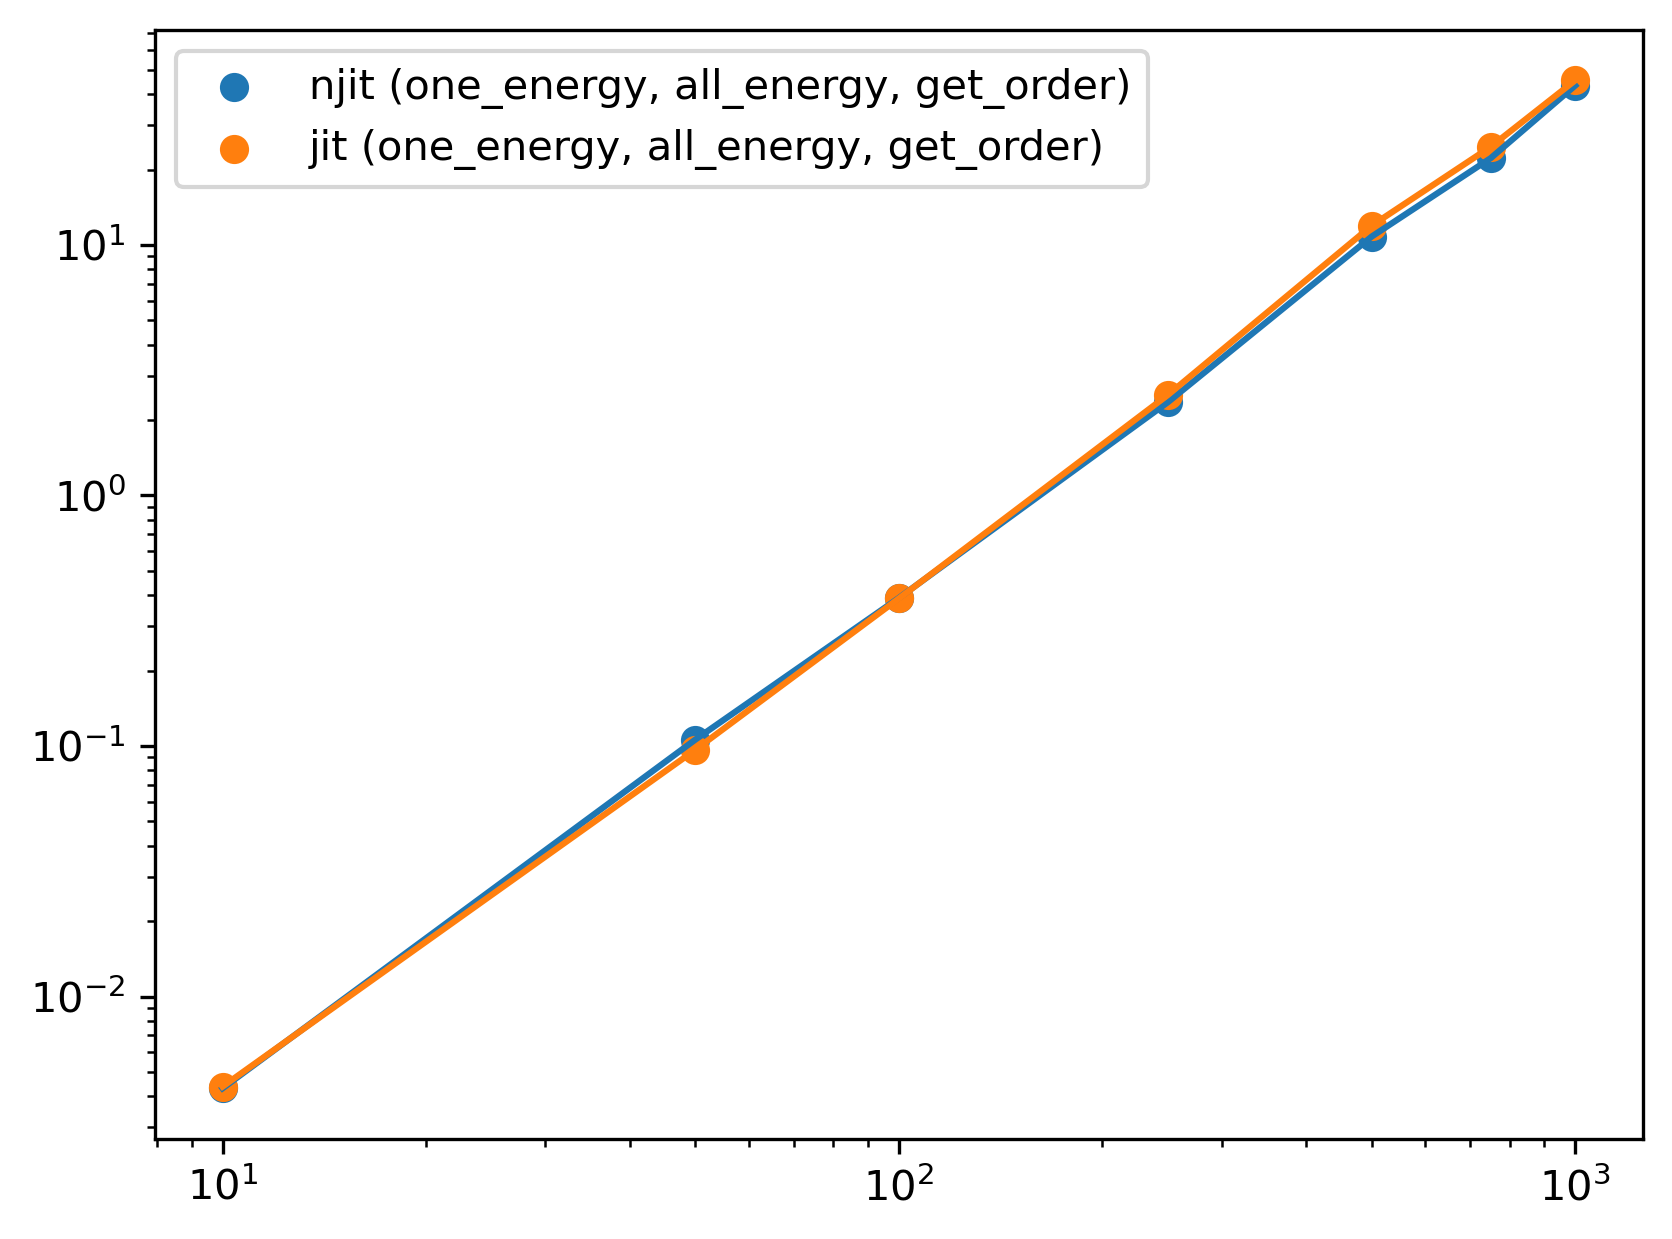

In [109]:
numba_allf = [0.0043, 0.106,0.39, 2.36,10.8, 22.22, 43.3]
jit_oe_ae_go = [0.004368,0.096534, 0.388053, 2.523005, 11.940983,24.669371,45.42]
size2 = [10,50,100,250,500,750,1000]


fig, ax = plt.subplots()
ax.scatter(size2, numba_allf, label='njit (one_energy, all_energy, get_order)', )
ax.plot(size2, numba_allf)

ax.scatter(size2, jit_oe_ae_go, label='jit (one_energy, all_energy, get_order)', )
ax.plot(size2, jit_oe_ae_go)

ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()

============================================================================================================================================================================================================================================================================================

In [39]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

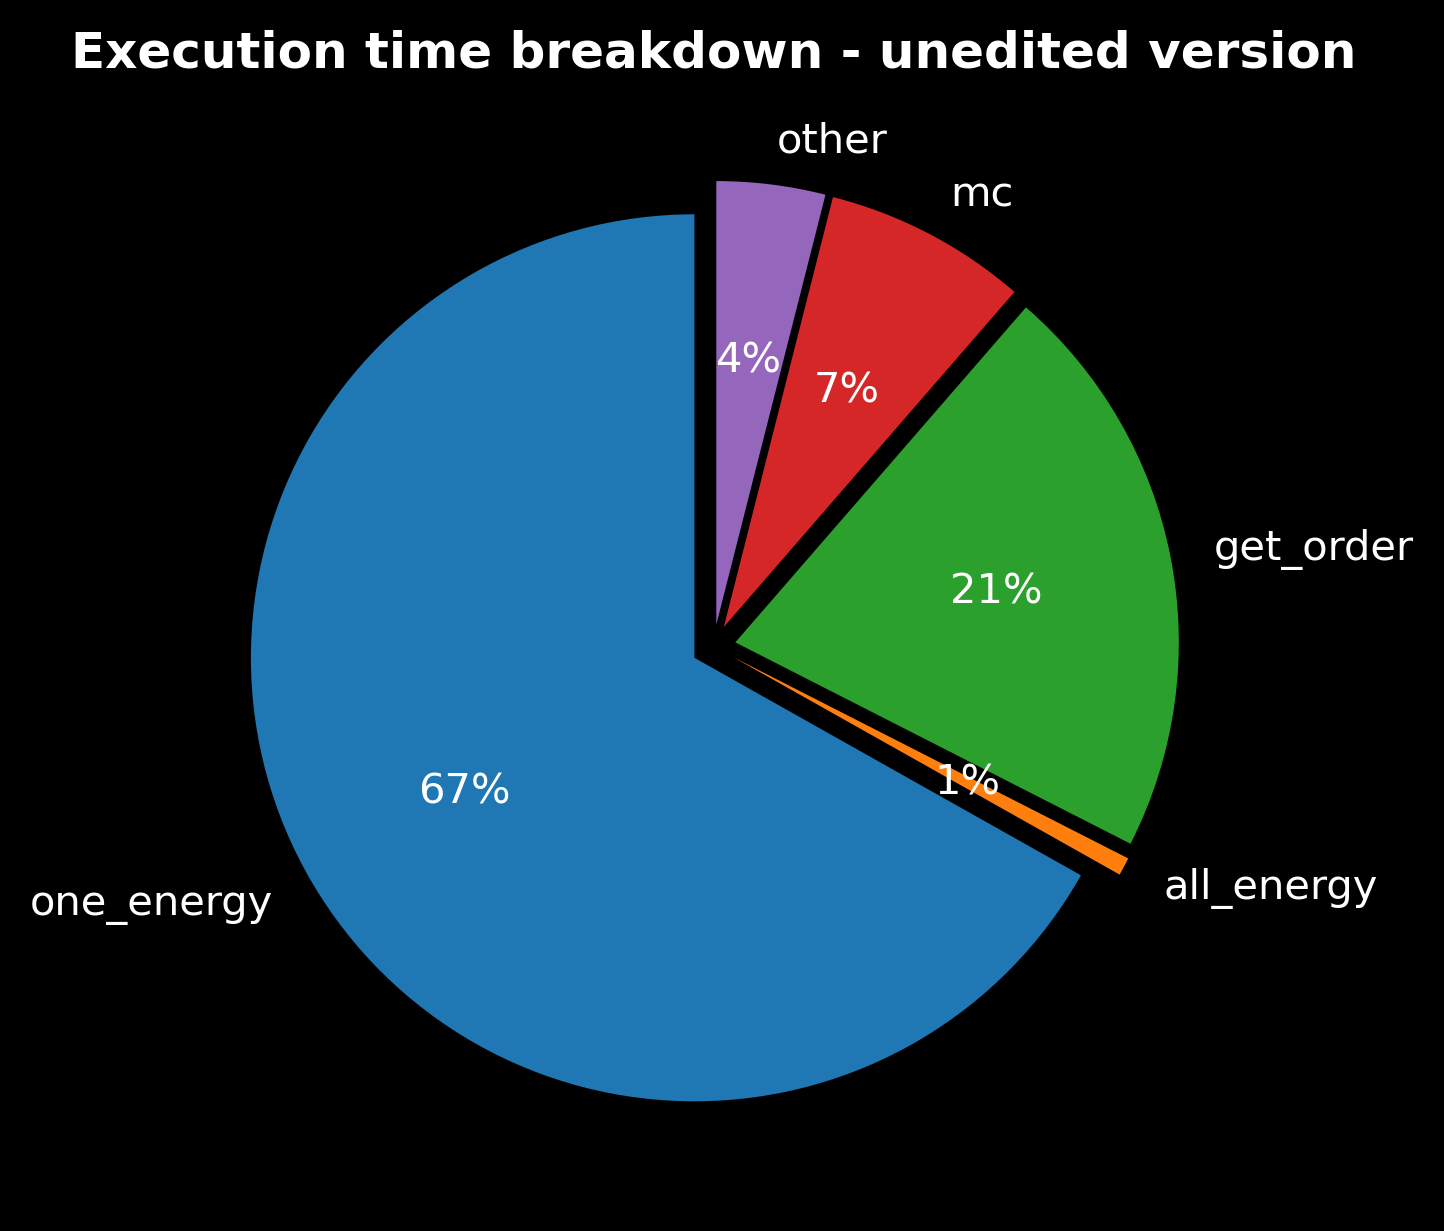

In [41]:
tot_time = 7.308276
oe_time = 4.885
ae_time = 0.048
go_time = 1.544
mc_time = 0.542
other_time = tot_time - oe_time - ae_time -go_time-mc_time

oe_time+ae_time+go_time+mc_time

times = [oe_time/tot_time, ae_time/tot_time, go_time/tot_time,
         mc_time/tot_time, other_time/tot_time]

labels = ['one_energy', 'all_energy', 'get_order', 'mc', 'other']
fig, ax = plt.subplots()
fig.set_facecolor('black')
ax.set_title('Execution time breakdown - unedited version', color='white', fontweight='bold')
#fig.suptitle('Time breakdown for unedited version')
ax.pie(times, labels=labels,explode = (0.05, 0.05, 0.05, 0.05, 0.05), autopct='%1.0f%%',
       textprops={'color':"w"},startangle=90);

plt.savefig('piechart.pdf')

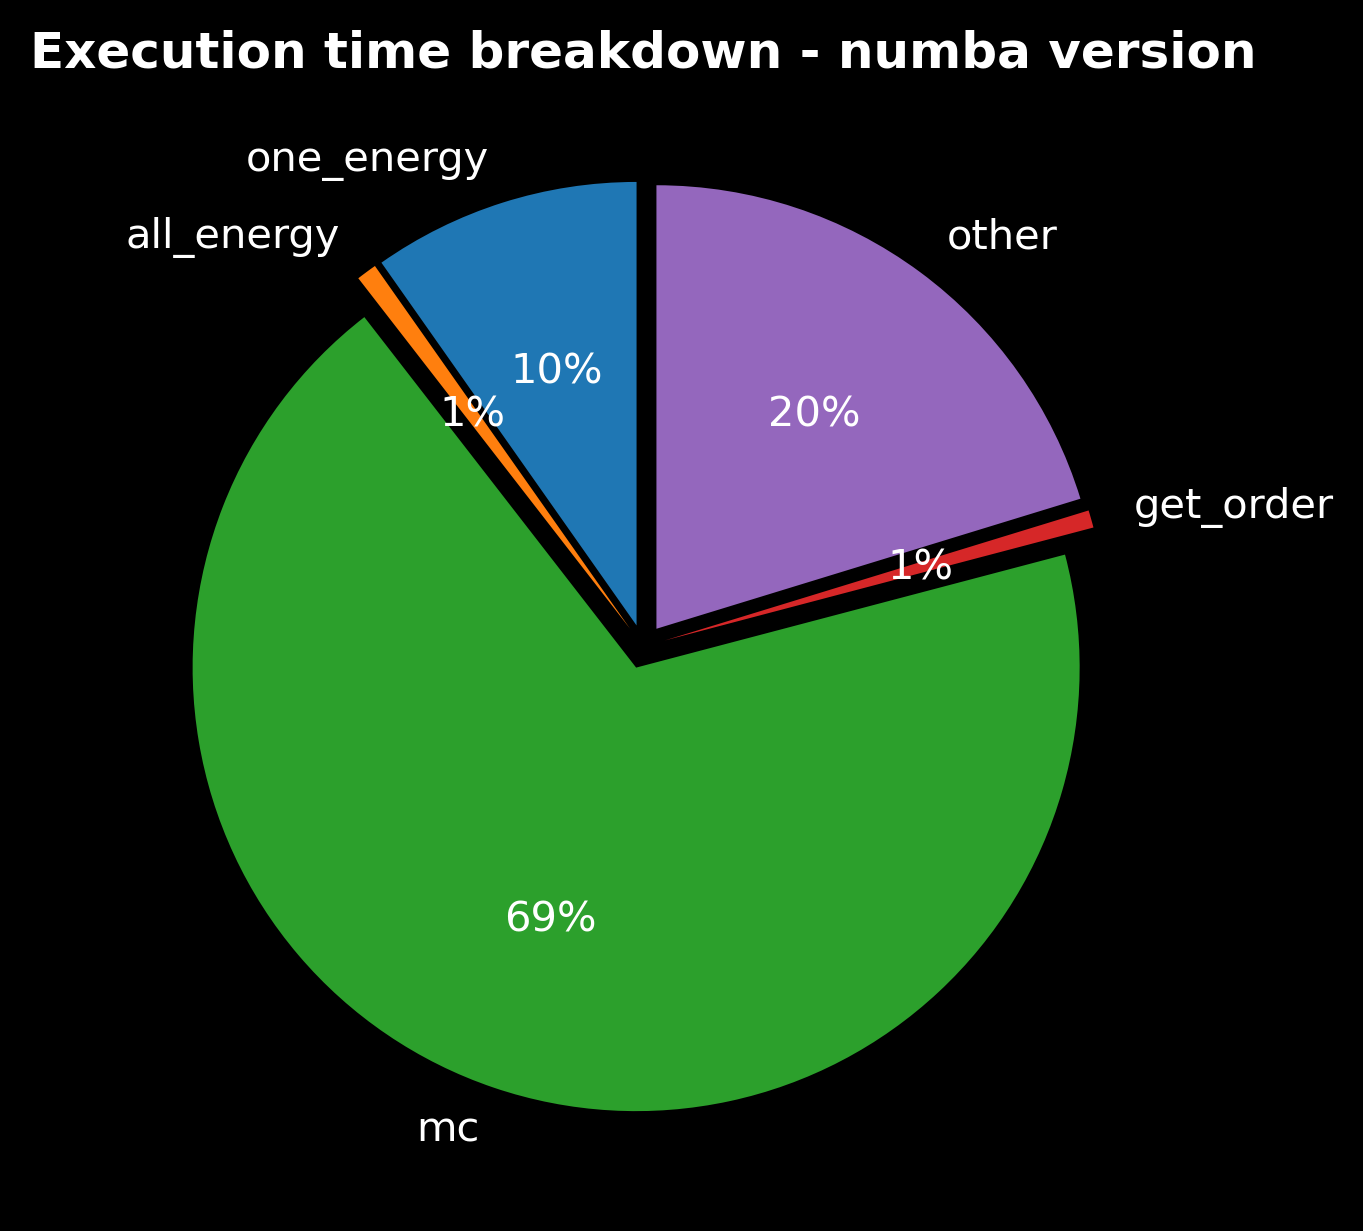

In [45]:
tot_time = 0.9431
oe_time = 0.092
ae_time = 0.007
go_time = 0.006
mc_time = 0.647
other_time = tot_time - oe_time - ae_time -go_time-mc_time

oe_time+ae_time+go_time+mc_time

times = [oe_time/tot_time, ae_time/tot_time, 
         mc_time/tot_time, go_time/tot_time,other_time/tot_time]

labels = ['one_energy', 'all_energy', 'mc', 'get_order', 'other']
fig, ax = plt.subplots()
fig.set_facecolor('black')
ax.set_title('Execution time breakdown - numba version', color='white', fontweight='bold')
#fig.suptitle('Time breakdown for unedited version')
ax.pie(times, labels=labels,explode = (0.05, 0.05, 0.05, 0.05, 0.05), autopct='%1.0f%%',
       textprops={'color':"w"},startangle=90);

plt.savefig('piechart.pdf')

MPI

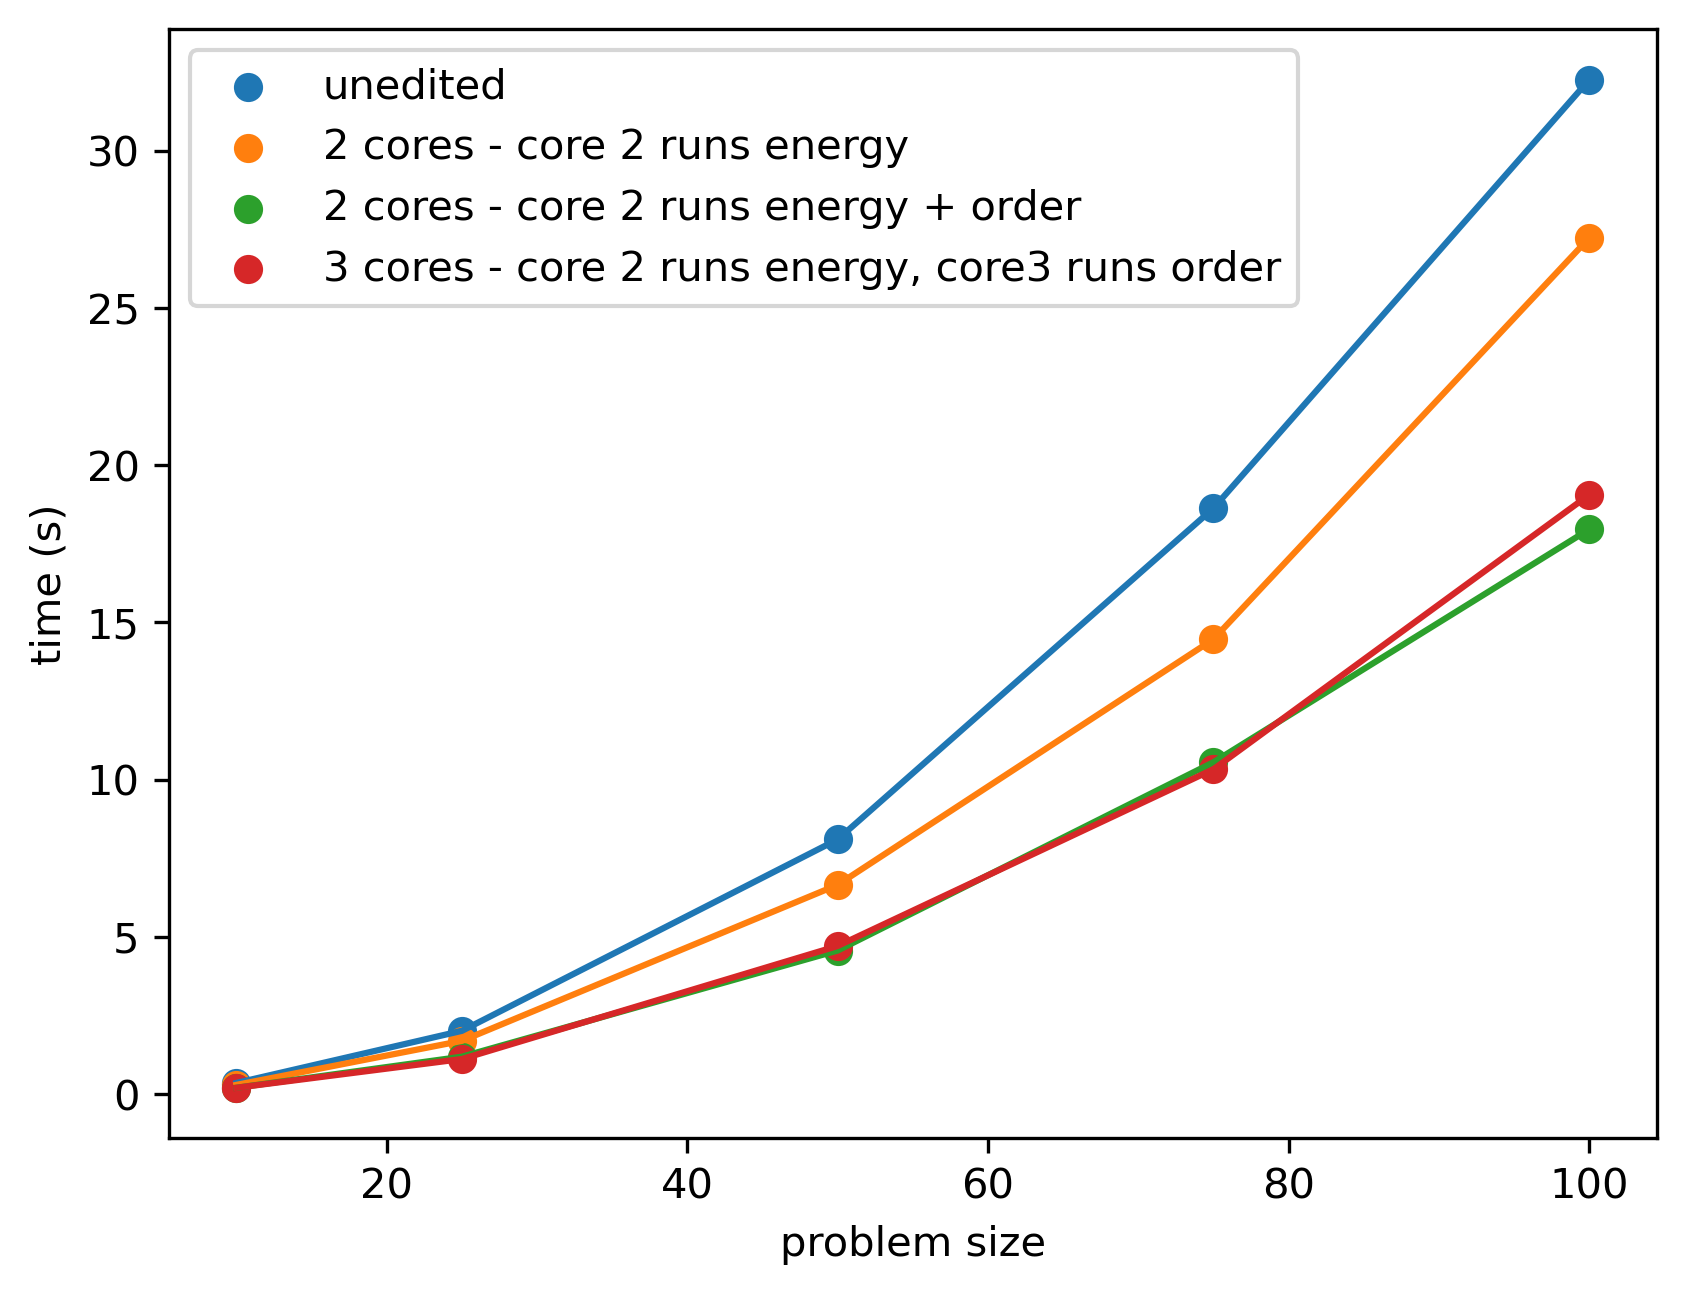

In [298]:
sizes=[10,25,50,75,100]
mpi_sizes=[10,25,50,75,100,200]
ue_t = [0.3536, 2.0112, 8.0991, 18.6323,32.26]
c2_e = [0.292, 1.6922, 6.654,14.466, 27.23]
c2_e_o = [0.201,1.188,4.565, 10.553, 17.962]

c2e_c3o = [0.2, 1.114 ,4.71, 10.33,19.06]

c3_e = [0.29, 1.7, 6.56, 14.45,25.4]


fig, ax = plt.subplots()

ax.scatter(sizes, ue_t, label='unedited')
ax.plot(sizes, ue_t)

ax.scatter(sizes, c2_e,label='2 cores - core 2 runs energy')
ax.plot(sizes, c2_e)

plt.scatter(sizes, c2_e_o, label='2 cores - core 2 runs energy + order')
plt.plot(sizes, c2_e_o)

plt.scatter(sizes, c2e_c3o, label='3 cores - core 2 runs energy, core3 runs order')
plt.plot(sizes, c2e_c3o)

#ax.scatter(sizes, c3_e, label='3 cores')
#ax.plot(sizes, c3_e)

ax.set(xlabel = 'problem size',
      ylabel = 'time (s)')
ax.legend()
#plt.scatter(sizes, c3_e_o)
#plt.plot(sizes, c3_e_o)
#ax.set_yscale('log')
#ax.set_xscale('log')

#plt.savefig('onecore')

Here, the energy calculation function is parallelised such that the grid size is split up as evenly as possible. It seems increasing the cores has minimal effect over just using 1 core for energy and 1 for everything else. This is probably because core 0 ust still do MC step and order functions. Perhaps more speed up will be seen if the order function can be handled by multiple cores.<br>
for nmax=100, up to 10 cores all gave around 25-26s.

In [71]:
size=100
nproc=4
remainder = size%(nproc-1)
print(remainder)

for i in range(1,nproc):
    lower = (i-1)*floor(size/(nproc-1))
    upper = lower+floor(size/(nproc-1))
    if i==(nproc-1):
        upper += remainder
        
    print(f"task {i} gets {lower}->{upper}")

1
task 1 gets 0->33
task 2 gets 33->66
task 3 gets 66->100


In [77]:
import numpy as np
one = np.array([1,2,3,4])
two = np.array([1,2,3,4])
three = np.array([1,2,3,4])


In [80]:
for i in range(1,4):
    print(i)

1
2
3


In [107]:
cores = ['1','2','4','6','8']
times = [65, 51.21, 50.61, 55.64, 51.13]

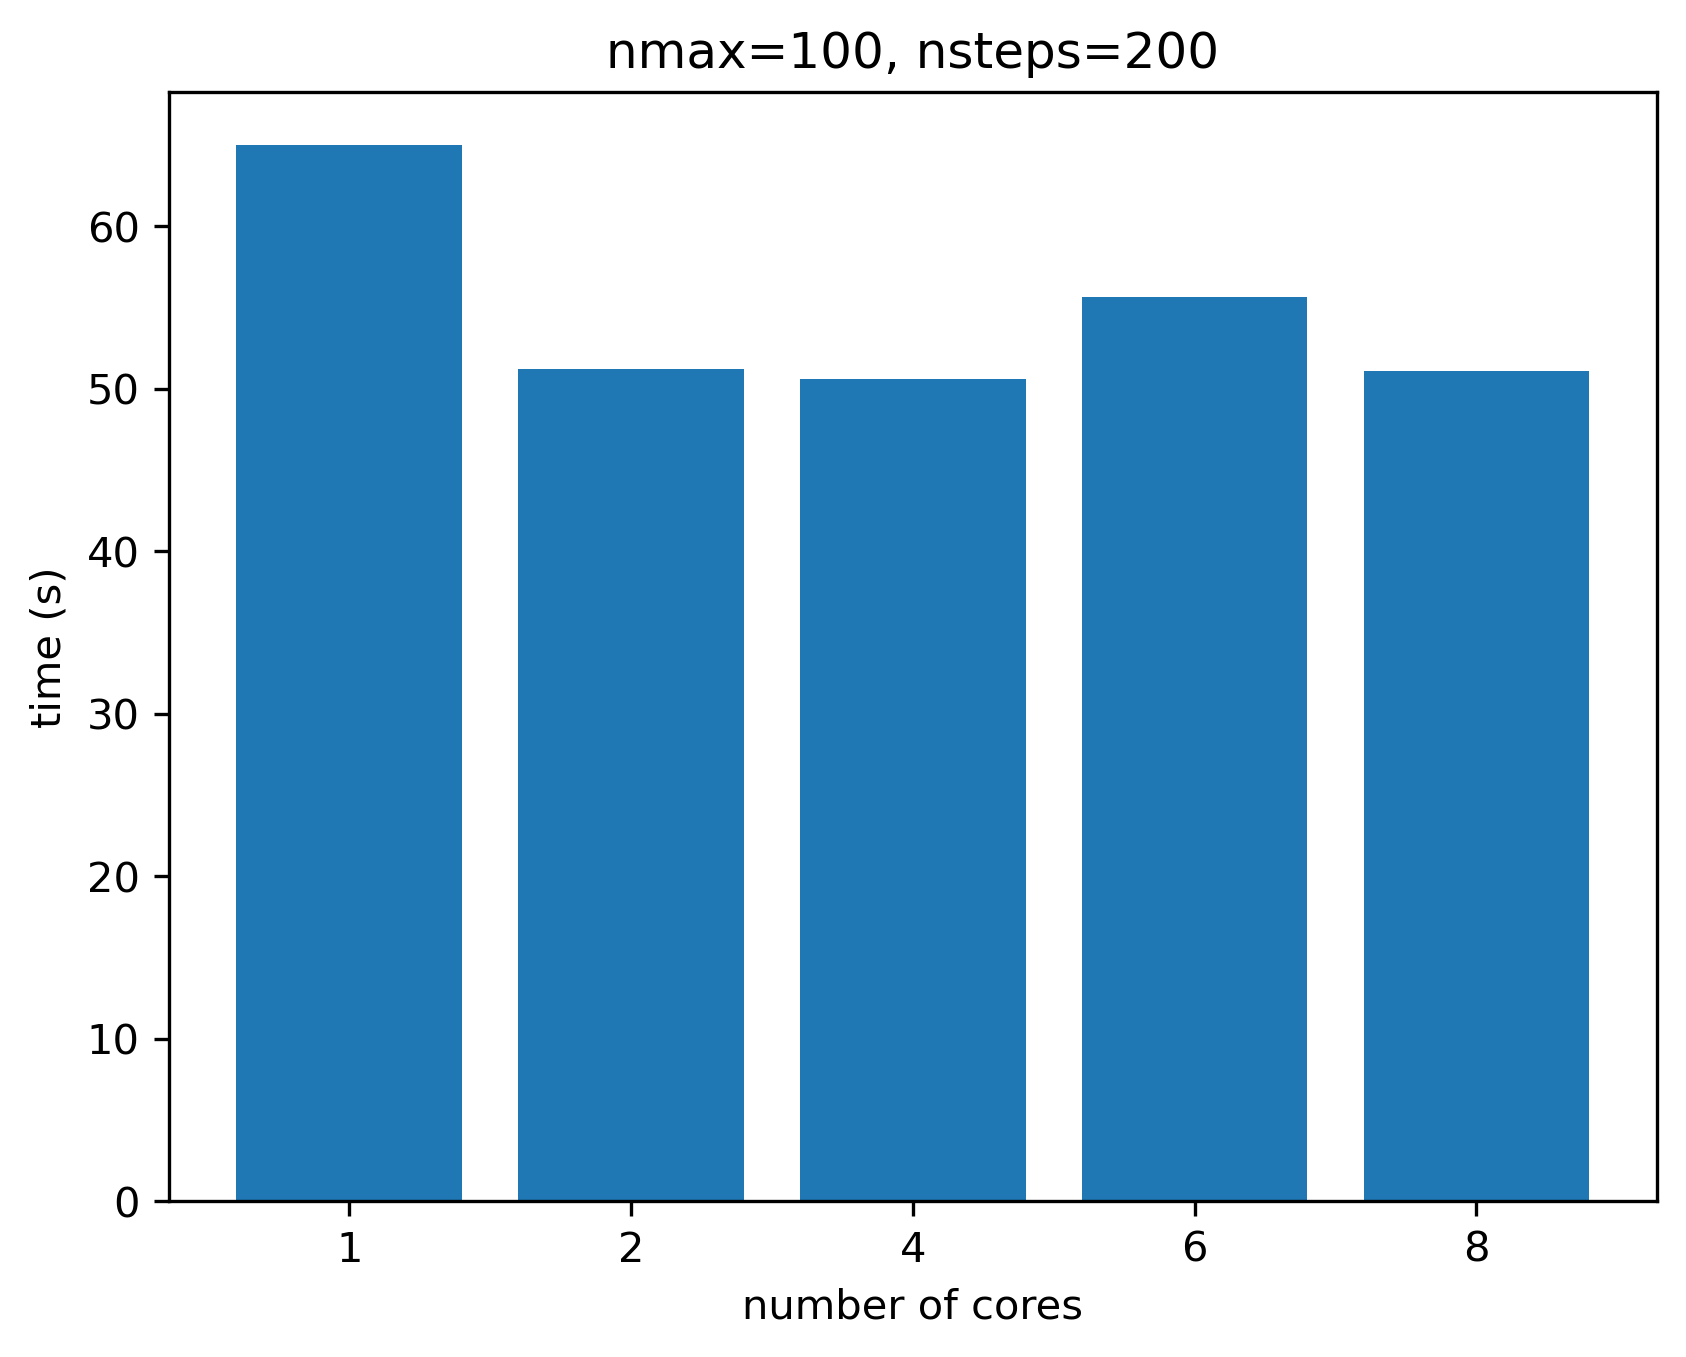

In [113]:
fig, ax = plt.subplots()
ax.bar(cores, times)
ax.set(xlabel='number of cores',
      ylabel='time (s)',
      title='nmax=100, nsteps=200');
plt.savefig('ncores')

CYTHON RESULTS

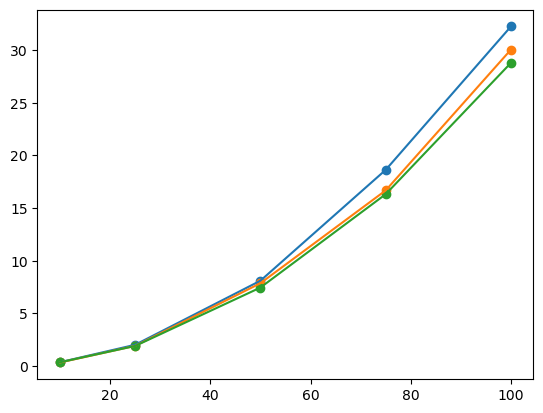

In [10]:
size_cy = [10,25,50,75,100]
cy_oe = [0.33,1.91,7.86,16.68,30.06]
ue_t = [0.3536, 2.0112, 8.0991, 18.6323,32.26]
cy_types = [0.35, 1.9, 7.45, 16.32, 28.8]

plt.plot(size_cy, ue_t)
plt.scatter(size_cy, ue_t)

plt.plot(size_cy, cy_oe)
plt.scatter(size_cy, cy_oe)

plt.plot(size_cy, cy_types)
plt.scatter(size_cy, cy_types)

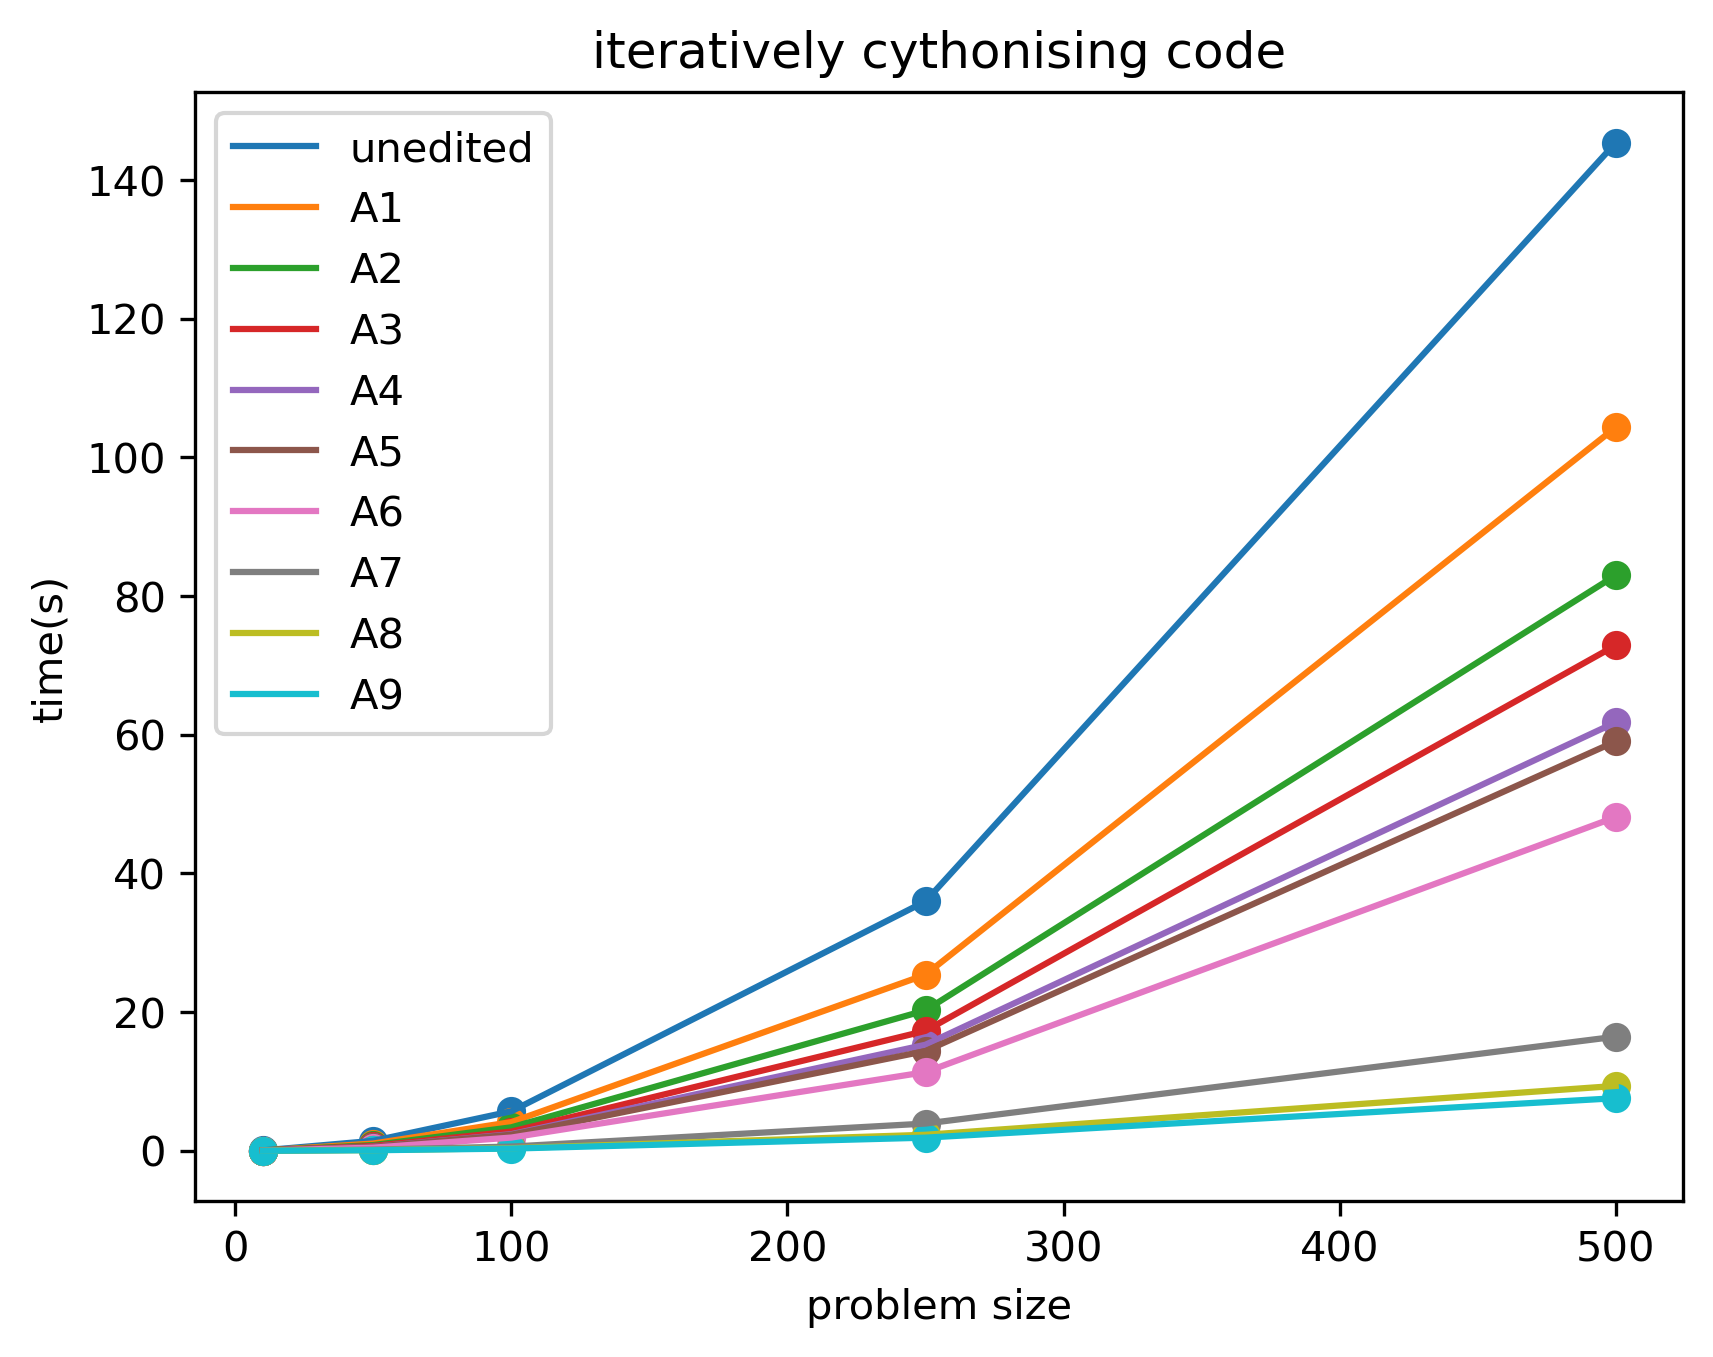

In [112]:
size = [10,50,100,250,500]
unedited = [0.061093, 1.438, 5.7, 35.982, 145.39]
cy_type = [0.041, 1.05, 4.14, 25.4, 104.34]
cy_a2_oe = [0.033, 0.83, 3.39, 20.26, 83]
cy_a2_oe_typed = [0.028 ,0.7,2.77,17.3,72.9]
cy_a2_oe_typed_ndarray = [0.026, 0.58,2.4,15.3,61.8]
cy_a2_oe_ae_typed_ndarray=[0.025,0.57,2.32, 14.39, 59.05]
cy_a2_oe_ae_typed_ndarray_cmath=[0.02, 0.457, 1.91, 11.35, 48.13]
cy_a2_oe_ae_go_typed_ndarray_cmath=[0.0096,0.1734, 0.61, 3.93, 16.46]
cy_a2_oe_ae_go_mcs_typed_ndarray_cmath=[0.0053,0.099, 0.376, 2.311, 9.36]

#return types and np.exp->exp from math.h
cy_a2_final = [0.00472, 0.081, 0.321, 1.895, 7.59]


fig, ax = plt.subplots()

ax.plot(size, unedited, label='unedited')
ax.scatter(size, unedited)

ax.plot(size, cy_type, label='A1')
ax.scatter(size, cy_type)

ax.plot(size, cy_a2_oe, label='A2')
ax.scatter(size, cy_a2_oe)

ax.plot(size, cy_a2_oe_typed, label='A3')
ax.scatter(size, cy_a2_oe_typed)

ax.plot(size, cy_a2_oe_typed_ndarray, label='A4')
ax.scatter(size, cy_a2_oe_typed_ndarray)

ax.plot(size, cy_a2_oe_ae_typed_ndarray, label='A5')
ax.scatter(size, cy_a2_oe_ae_typed_ndarray)

ax.plot(size, cy_a2_oe_ae_typed_ndarray_cmath, label='A6')
ax.scatter(size, cy_a2_oe_ae_typed_ndarray_cmath)

ax.plot(size, cy_a2_oe_ae_go_typed_ndarray_cmath, label='A7')
ax.scatter(size, cy_a2_oe_ae_go_typed_ndarray_cmath)

ax.plot(size, cy_a2_oe_ae_go_mcs_typed_ndarray_cmath, label='A8')
ax.scatter(size, cy_a2_oe_ae_go_mcs_typed_ndarray_cmath)

ax.plot(size, cy_a2_final, label='A9')
ax.scatter(size, cy_a2_final)

ax.set(xlabel = 'problem size',
       ylabel = 'time(s)',
       title = 'iteratively cythonising code')
ax.legend();


#plt.savefig('cythonising.png')


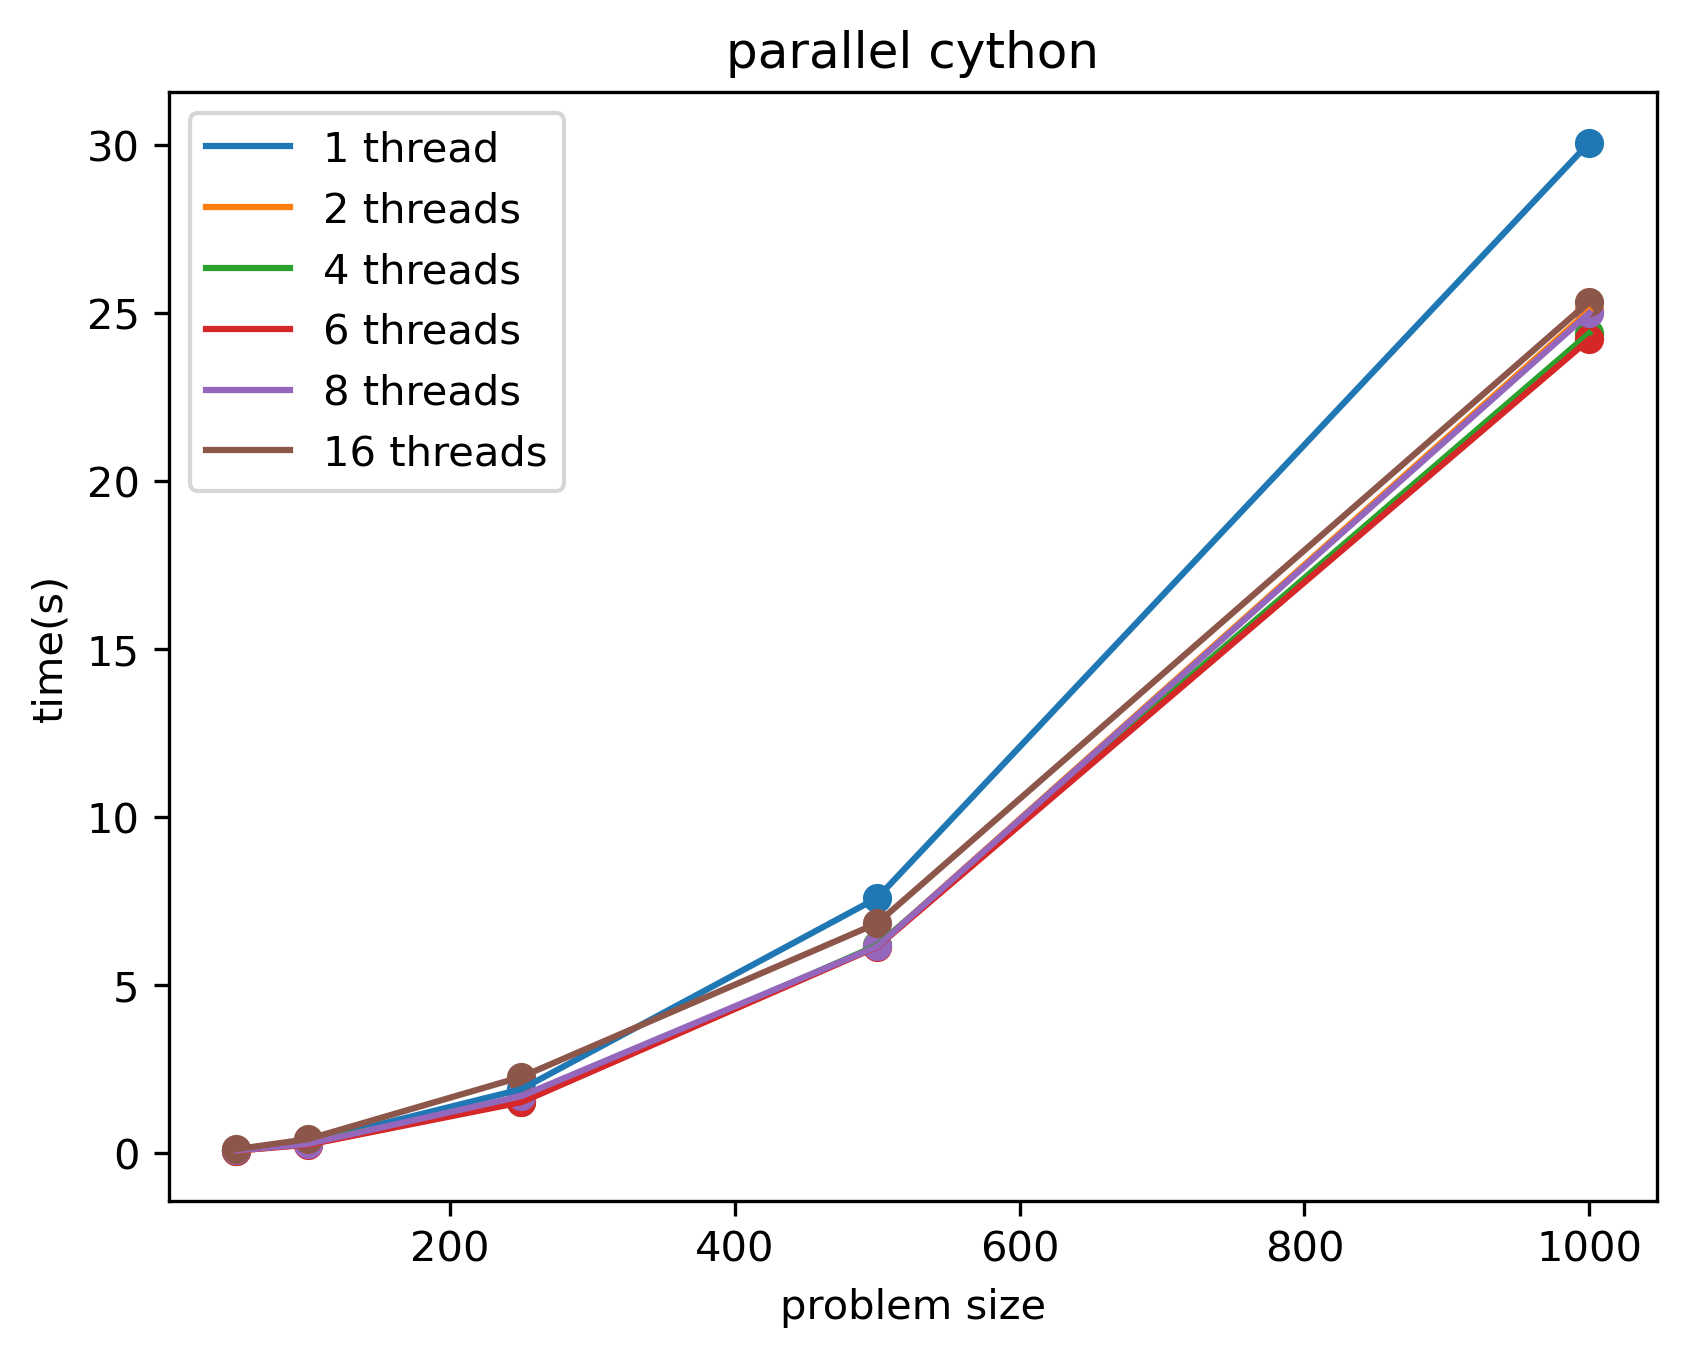

In [299]:
size = [50,100,250,500,1000]
c1=[0.081, 0.321, 1.895, 7.59, 30.07]
c2 = [0.066,0.253,1.535,6.153,25.077]
c4=[0.064,0.332,1.529,6.181,24.4]
c6=[0.069, 0.243,1.507,6.136,24.216]
c8=[0.076, 0.266, 1.689, 6.147,25]
c16=[0.113, 0.408,2.262,6.837,25.34]

fig,ax=plt.subplots()

ax.plot(size,c1, label='1 thread')
ax.scatter(size,c1)

ax.plot(size,c2, label='2 threads')
ax.scatter(size,c2)

ax.plot(size,c4, label='4 threads')
ax.scatter(size,c4)

ax.plot(size,c6, label='6 threads')
ax.scatter(size,c6)

ax.plot(size,c8, label='8 threads')
ax.scatter(size,c8)

ax.plot(size,c16, label='16 threads')
ax.scatter(size,c16)

ax.set(xlabel='problem size',
    ylabel='time(s)',
      title='parallel cython')
ax.legend()

plt.savefig('parallel_cython.png')

In [ ]:
c1_1000 = [30.07, 31.53, 31.54, 32.01, 31.19, 31.457]
c2_1000 = [25.077, 25.095, 25.067, 25.91, 24.69, 25.46]
c4_1000 = [25.04, 24.48, 26.11, 26.18, 25.34, 25.13]
c8_1000 = [25.94, 26.32,25.55, 25.66, 26.04, 25.92]
c16_1000 = [25.62, 25.34,25.69, 25.59, 26.14, 25.61]

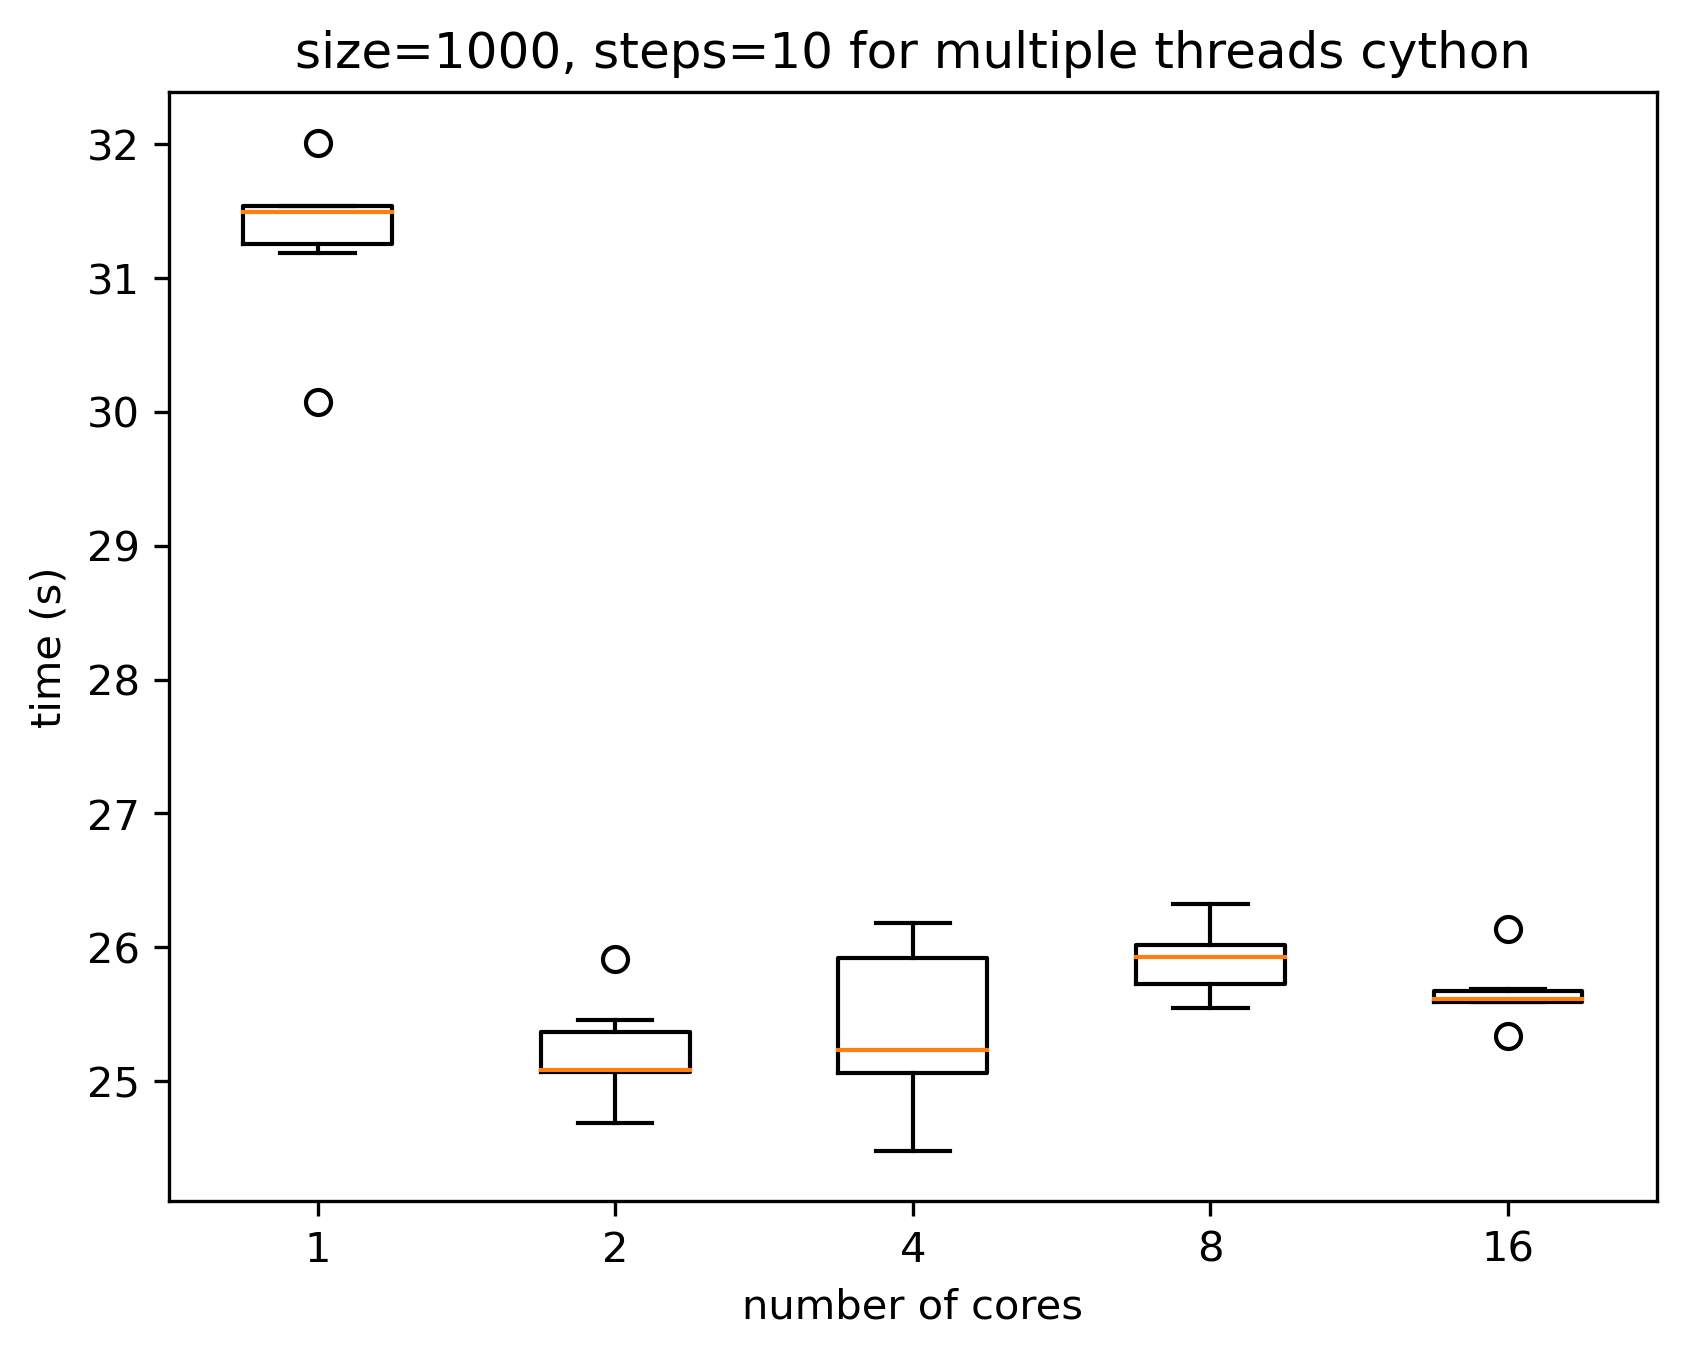

In [78]:
import numpy as np
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot([c1_1000,c2_1000, c4_1000, c8_1000, c16_1000]);
ax1.set_xticks([1, 2, 3,4,5], ['1', '2', '4', '8','16']);
ax1.set(title='size=1000, steps=10 for multiple threads cython',
       xlabel = 'number of cores',
       ylabel = 'time (s)');
plt.savefig('parallel_cython.png')

In [344]:
numba_best = [0.0043, 0.106,0.39, 2.36,10.8, 22.22, 43.3]
cython_best = [0.00472, 0.081, 0.321, 1.895, 7.59]
mpi_best = [0.201,1.188,4.565, 10.553, 17.962]
unedited = [0.061093, 1.438, 5.7, 35.982, 145.39]
uebc4 = [0.3536, 2.0112, 8.0991, 18.6323,32.26]
cython_2cores = [0.066,0.253,1.535,6.153,25.077]

s1 = [10,50,100,250,500,750,1000]
s2 = [10,50,100,250,500]
s3 = [10,25,50,75,100]
s4 = [50,100,250,500,1000]

In [359]:
plt.rcParams['savefig.dpi'] = 300

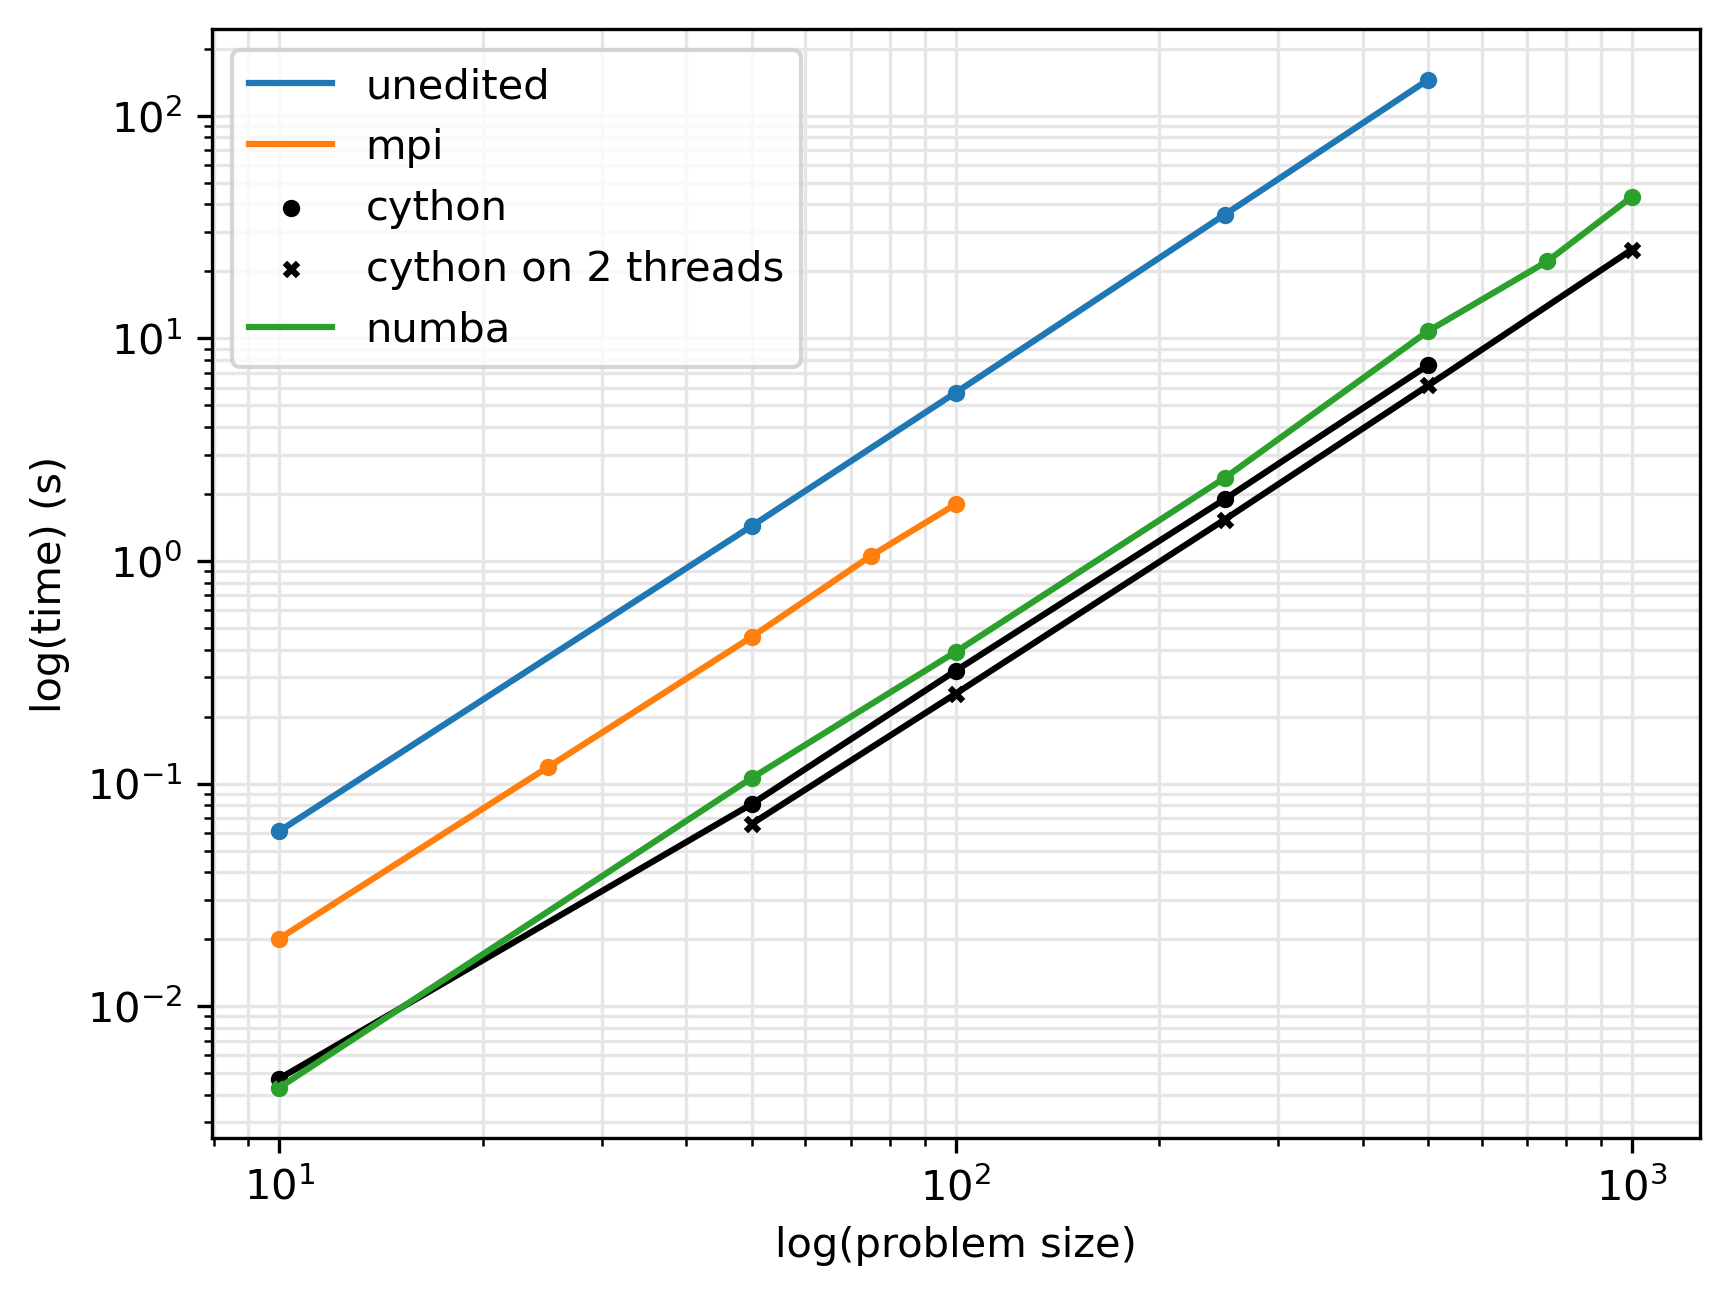

In [360]:
fig, ax = plt.subplots()
plt.grid(True, which="both",  ls="-", color='0.9')
ax.set_axisbelow(True)

ax.plot(s2, unedited, label='unedited')
ax.scatter(s2, unedited,s=10)

ax.plot(s3, np.asarray(mpi_best)/10, label='mpi')
ax.scatter(s3, np.asarray(mpi_best)/10,s=10)

ax.plot(s2, cython_best, c='black')
ax.scatter(s2, cython_best, c='black',s=10, label='cython')

ax.plot(s4, cython_2cores, c='black')
ax.scatter(s4, cython_2cores, c='black', marker='x', s=10, label='cython on 2 threads')

ax.plot(s1, numba_best, label ='numba')
ax.scatter(s1, numba_best,s=10)


ax.set_xlabel('log(problem size)')
ax.set_ylabel('log(time) (s)')

ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()

plt.savefig('comparison.png')

In [246]:
import pandas as pd
import numpy as np

filename = "tests/10steps_20grid/LL-Output-Thu-26-Oct-2023-at-10-41-18AM.txt"

def read_LL_file(filename):
    '''
    Reads LL.txt file as pandas df.
    Inputs:
    - filename: str, path to .txt file
    Returns:
    - data: pandas DataFrame, LL simulation output data

    Usage:
    get certain value from column:
    >> print(data.loc[:,'Order'].iloc[2])
    '''
    data = pd.read_csv(filename, header = 7, delim_whitespace=True)
    # data written the same. real data will always be from line data.iloc[8] onwards
    # header is in line data.iloc[6]
    data = data.iloc[1:]
    # remap columns and drop spares
    dict = {'#':'MC_step', 'MC':'Ratio','step:':'Energy','Ratio:':'Order','Energy:':'0','Order:':'1'}
    data.rename(mapper = dict,axis ='columns', inplace=True)
    data.drop(['0','1'], axis =1, inplace=True)
    data.set_index('MC_step', inplace=True)

    return data


In [253]:
dat_o = read_LL_file("numpy_vec/LL-Output-Fri-03-Nov-2023-at-10-04-43AM.txt")
dat_s = read_LL_file("numpy_vec/LL-Output-Fri-03-Nov-2023-at-10-05-50AM.txt")

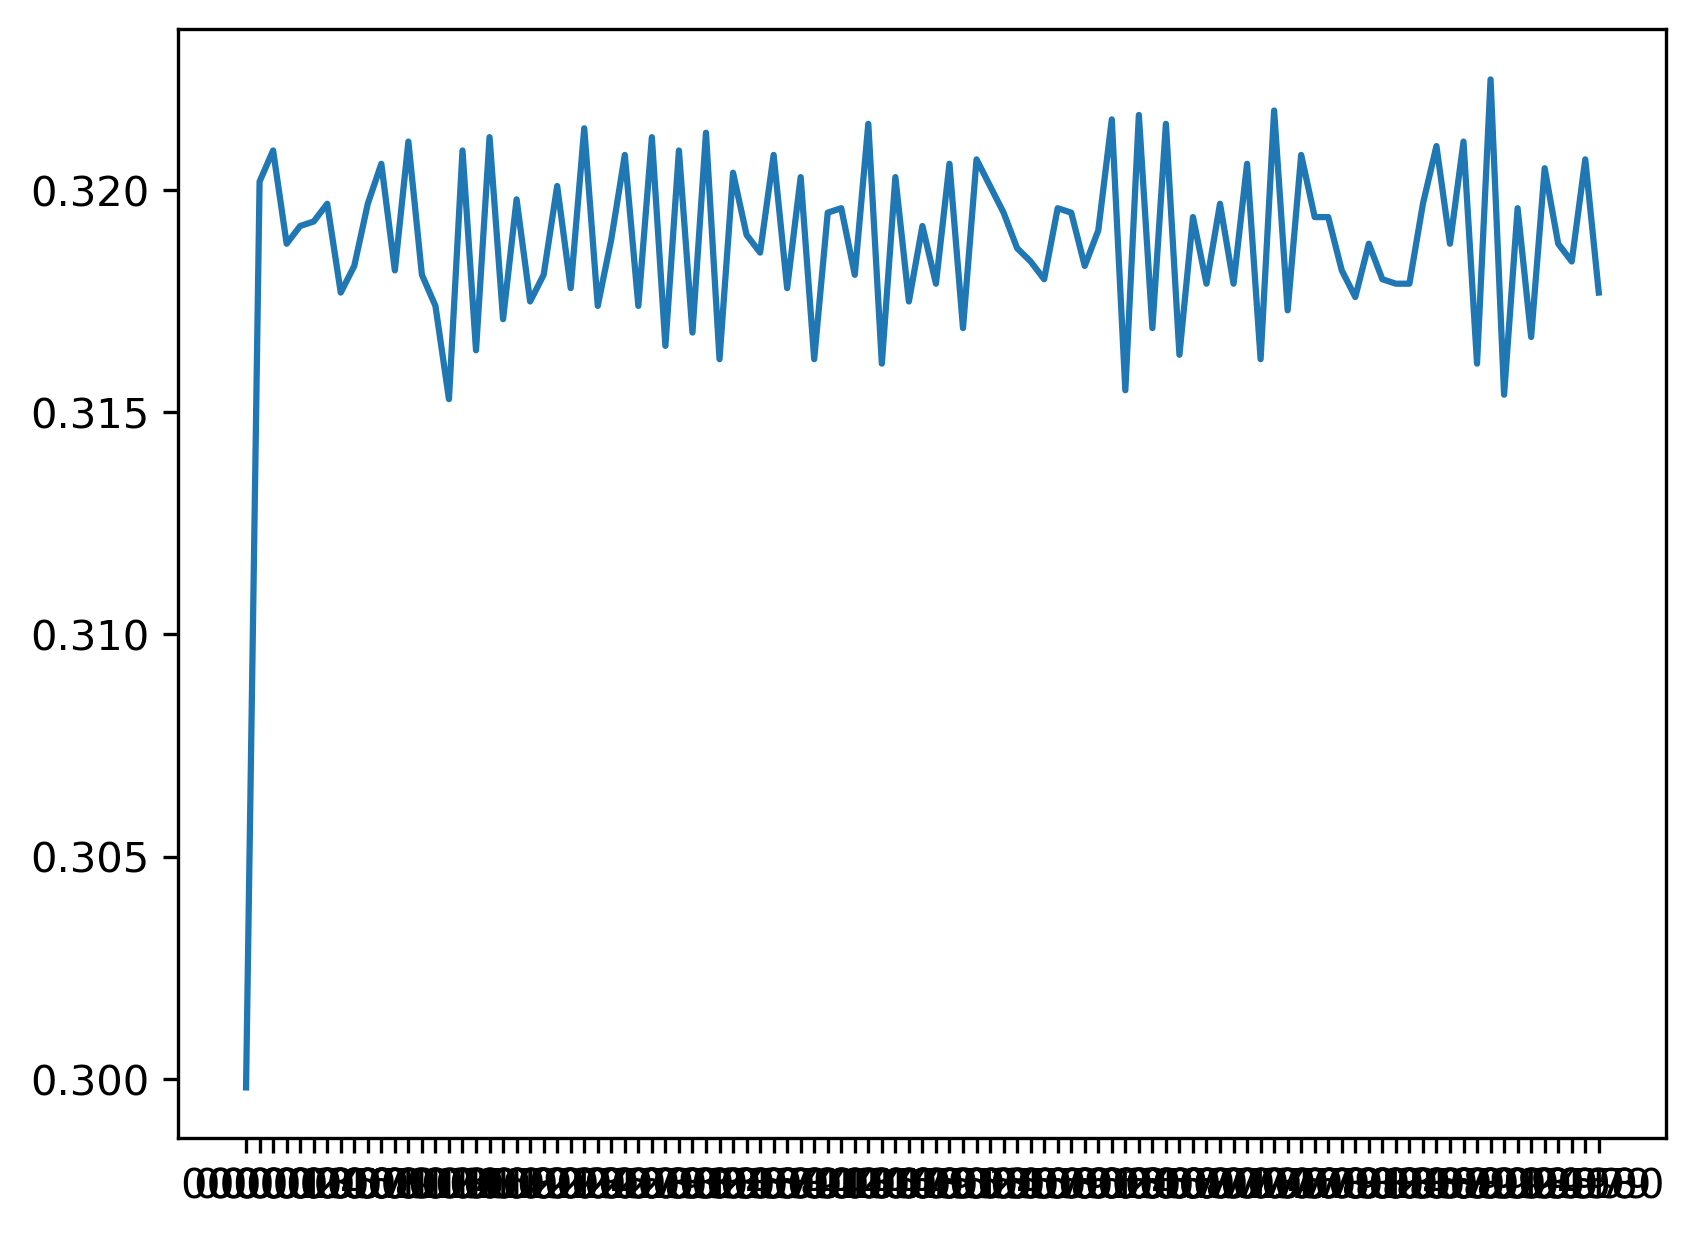

In [273]:
plt.plot(dat_o.index, dat_o.Order)

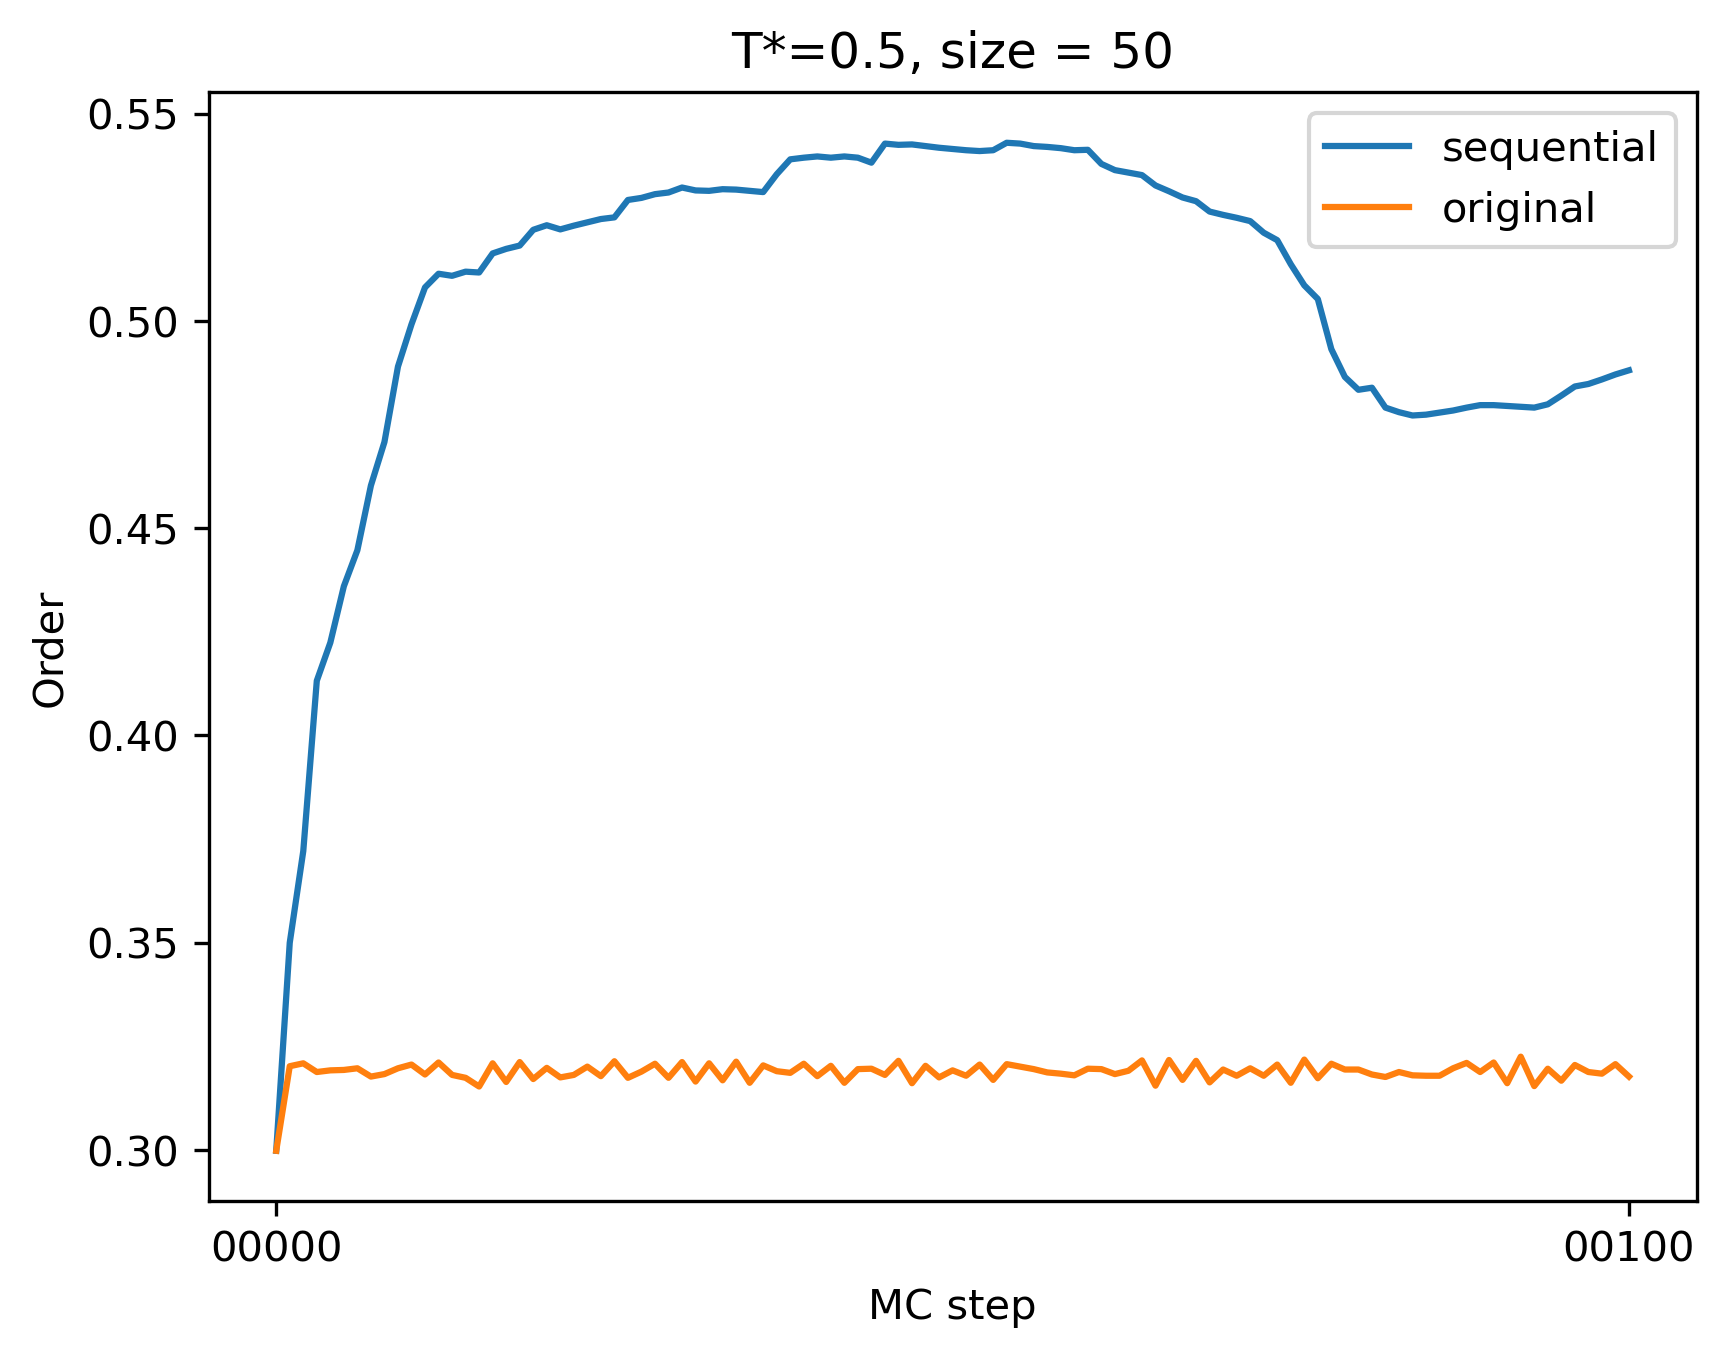

In [277]:
fig,ax = plt.subplots()
ax.plot(dat_s.index, dat_s.Order, label='sequential')
ax.plot(dat_o.index, dat_o.Order, label='original')
my_xticks = ax.get_xticks()
plt.xticks([my_xticks[0], my_xticks[-1]], visible=True, rotation=0)
ax.set(xlabel = 'MC step',
      ylabel = 'Order',
      title = 'T*=0.5, size = 50')
ax.legend()

plt.savefig('comparison.png')

In [337]:
s = np.linspace(0,24,25)

In [339]:
s.append(s,2)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

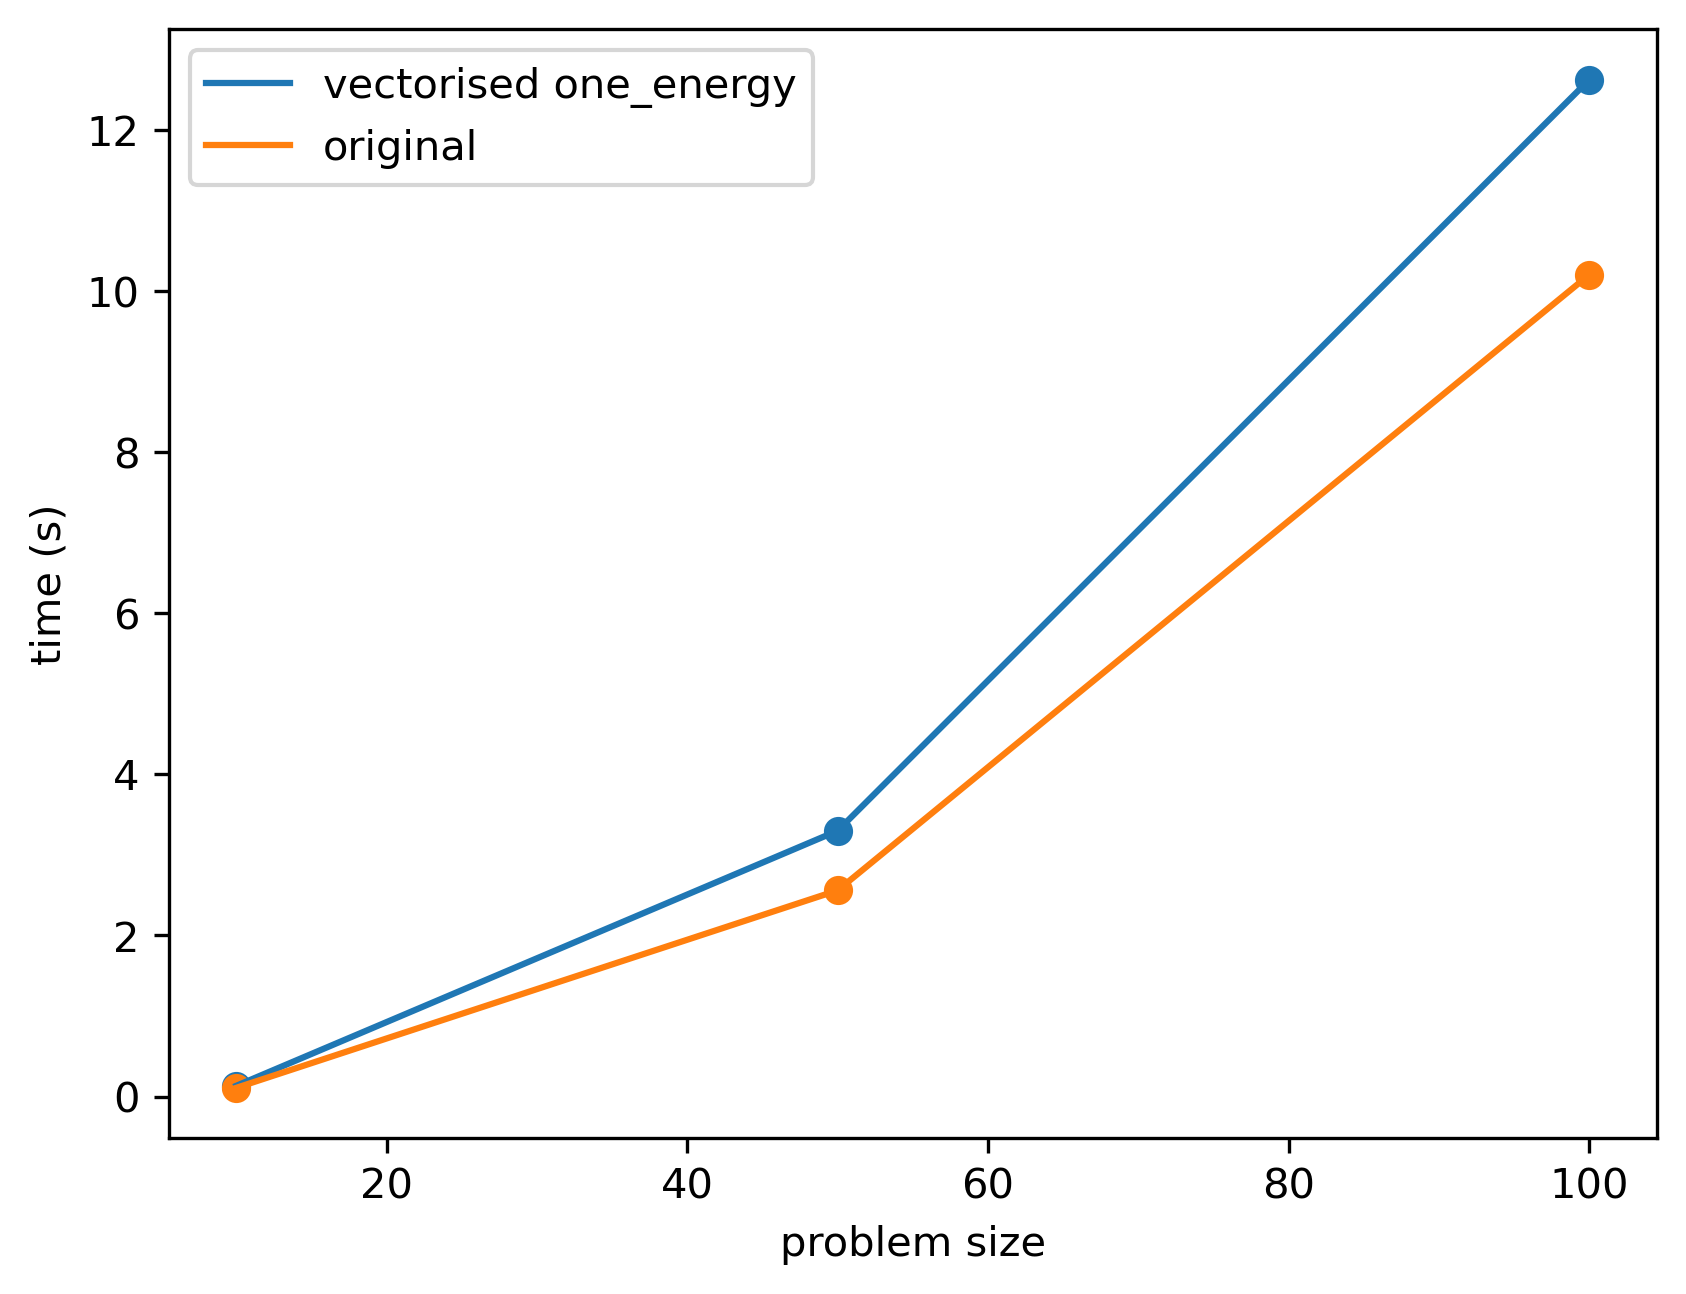

In [334]:
v2 = [0.135,3.3, 12.62]
orig = [0.11, 2.56, 10.2]
size=[10,50,100]

fig,ax=plt.subplots()
ax.plot(size, v2, label='vectorised one_energy')
ax.scatter(size, v2)

ax.plot(size, orig, label='original')
ax.scatter(size, orig)

ax.set(xlabel='problem size', ylabel='time (s)')
ax.legend()
plt.savefig('numpyvec.png')